<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression, roc_curve, roc_auc_score
* pca

In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.datasets as skd

# regression, roc_curve, roc_auc_score

In [7]:
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [8]:
s1 = raw['titanic']
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
s1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
s1 = s1[['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class']]
s1.head()

,survived,sex,age,sibsp,parch,fare,embarked,class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third


In [13]:
s1 = s1.assign(fam = s1.sibsp + s1.parch + 1,
          embarked = s1.embarked.fillna(s1.embarked.mode())
          )
s1.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,fam
0,0,male,22.0,1,0,7.2500,S,Third,2
1,1,female,38.0,1,0,71.2833,C,First,2
2,1,female,26.0,0,0,7.9250,S,Third,1
3,1,female,35.0,1,0,53.1000,S,First,2
4,0,male,35.0,0,0,8.0500,S,Third,1


In [31]:
s2 = pd.get_dummies(s1, columns = ['sex', 'class', 'embarked'])
s2.head()

,survived,age,sibsp,parch,fare,fam,sex_female,sex_male,class_First,class_Second,class_Third,embarked_C,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,2,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,2,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,2,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,1


In [32]:
b1 = s2['age']

In [33]:
imputer = KNNImputer(n_neighbors = 5)

In [35]:
s_ = imputer.fit_transform(s2)
s3 = pd.DataFrame(s_, columns = s2.columns)
s3.head()

,survived,age,sibsp,parch,fare,fam,sex_female,sex_male,class_First,class_Second,class_Third,embarked_C,embarked_Q,embarked_S
0,0.0,22.0,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
test_density = pd.DataFrame(np.c_[np.arange(len(s2)), b1, s3['age'].values.reshape(-1,1)], 
                            columns = ['idx', 'old', 'new'])
test_density.head()

,idx,old,new
0,0.0,22.0,22.0
1,1.0,38.0,38.0
2,2.0,26.0,26.0
3,3.0,35.0,35.0
4,4.0,35.0,35.0


In [39]:
test_density = pd.melt(test_density, id_vars = 'idx')
test_density.head()

,idx,variable,value
0,0.0,old,22.0
1,1.0,old,38.0
2,2.0,old,26.0
3,3.0,old,35.0
4,4.0,old,35.0


In [40]:
import plotnine as gg
from plotnine import ggplot, aes

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


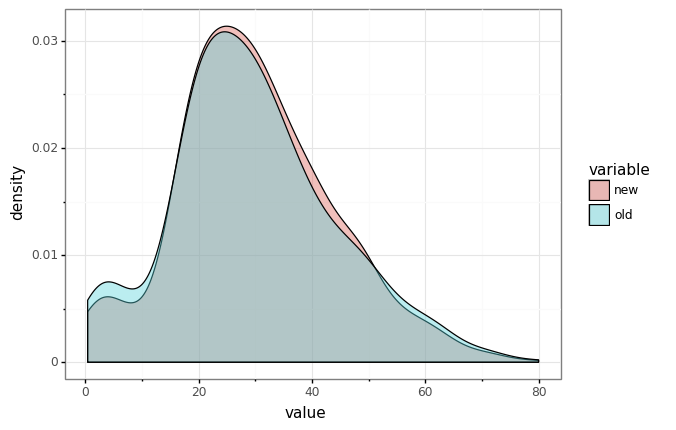

<ggplot: (8790283844413)>

In [43]:
(
    ggplot(test_density, aes('value', fill = 'variable')) +
    gg.geom_density(alpha = .4) +
    gg.theme_bw()
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


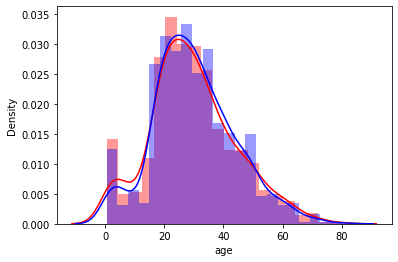

In [47]:
sns.distplot(b1, color = 'red')
sns.distplot(s3['age'], color = 'blue')

In [49]:
x = s3[['age', 'sibsp', 'parch', 'fare', 'fam', 'sex_female',
       'sex_male', 'class_First', 'class_Second', 'class_Third', 'embarked_C',
       'embarked_Q', 'embarked_S']]
y = s3['survived']

In [50]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [53]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)

In [56]:
roc_auc_score(y_tr, fit_rf.predict(x_tr)), roc_auc_score(y_te, pred_rf)

(0.9898646450185462, 0.7866666666666666)

In [57]:
tpr, fpr, threshold = roc_curve(y_te, proba_rf[:,-1])

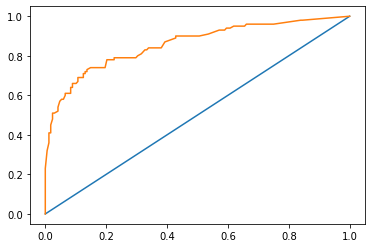

In [58]:
plt.plot([0,1],[0,1])
plt.plot(tpr, fpr)

# pca

In [59]:
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [61]:
v1 = raw['diamonds']
v1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
v1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [63]:
v1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [67]:
nums = v1[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
cats = v1[['color', 'clarity']]

In [68]:
nums_ = StandardScaler().fit_transform(nums)
cats_ = pd.get_dummies(cats, columns=['color', 'clarity'])

In [80]:
x = pd.DataFrame(np.c_[nums_, cats_.values],
             columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z'] + list(cats_.columns)
             )

In [123]:
pca = PCA(n_components = 10)
x_ = pca.fit_transform(x)

<BarContainer object of 10 artists>

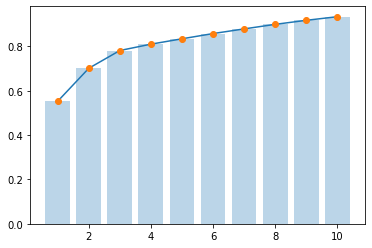

In [124]:
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum())
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), 'o')
plt.bar(range(1,11), pca.explained_variance_ratio_.cumsum(), alpha = .3)

In [125]:
x_ = pd.DataFrame(np.c_[x_, np.array(v1['cut'].values).reshape(-1,1)], 
                  columns = [f'pc{a}' for a in range(1,11)] + ['cut'])

In [126]:
x_.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,cut
0,-3.117385,-0.390507,-0.690699,0.033124,0.369657,0.356939,-0.25539,-0.981328,0.311479,-0.430591,Ideal
1,-3.053942,2.29521,0.48539,0.411873,-0.155502,-0.823659,-0.016284,-0.752467,0.22626,-0.129152,Premium
2,-2.723376,4.985221,0.33159,-0.32596,-0.248661,-0.179787,-0.456026,-0.972714,-0.210935,0.443424,Good
3,-2.608362,0.000608,0.650093,-0.623964,0.406945,-0.270637,0.265124,0.211096,-0.145474,0.050879,Premium
4,-2.364134,-0.464013,1.113048,-0.011359,0.161131,0.61936,-0.240391,-0.165998,0.05403,-0.429649,Good


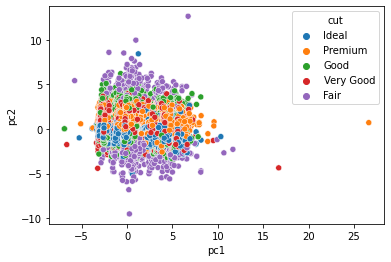

In [128]:
sns.scatterplot(data = x_, x = 'pc1', y = 'pc2', hue = 'cut')